# Weight timeseries data analysis
### Introduction
Here we will analyze a (fake) dataset of the weight of twenty individuals over time. The data is split up into two files:

1. `weight_data.csv` with columns: `|| person | Day_1 | ... | Day_6 ||`
2. `weight_metadata.csv`: `|| person | sex | homestate | ... | feature_n ||`

The challenges involved with this assignment will include transforming, merging, and aggregating this data in different ways in order to visualize different aspects. This assignment is for someone who has had at least some exposure to [`pandas`](https://pandas.pydata.org/) and plotting with [`seaborn`](https://seaborn.pydata.org/index.html).

If you're interested in seeing how this data was generated, take a look [here](https://github.com/michaelsilverstein/Pandas-and-Plotting/blob/master/weight_timeseries/weight_timeseries_generate_data.ipynb).

**Note**: This exercise will likely require you to search for the syntax to accomplish each task. I have done my best to strike a balance between providing the vocabulary (and some syntax) to describe some of the concepts but I believe the best way to learn these in part is to try and find the documentation to the functions that meet your need. I will also try to include random opportunities to learn helpful syntax...

Jupyter lab tips:
- `ctrl` + `enter` will run cells
- `shift` + `tab` when your cursor is in a function will display the documentation

In [2]:
"""Run this cell to load libraries!"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Brief Seaborn introduction
Before using `seaborn`, take a quick saunter around their [documenation](https://seaborn.pydata.org/). Here you will see the types of figures `seaborn` makes so easy. `Seaborn` is a "wrapper" of sorts - it's built on top of Python's plotting library [`matplotlib`](https://matplotlib.org/) and allows for easy implementation of plotting categorical data.

`Seaborn` accepts "longform" data structures as input in order to generalize the categorical assocation of each element of your data. [Take a look at my brief introduction to melting and pivotting here](https://github.com/michaelsilverstein/Pandas-and-Plotting/blob/master/lessons/melting_pivotting.ipynb) which are the methods of data transformation that allow you to shift data between longform and wideform types.

In order to illustrate `seaborn`'s syntax, we'll start off with a super short example that highlights the use of the `hue` parameter which allows you to indicate the set of categories to color your data by when plotting.

In [53]:
"""Seaborn hue example"""
# Let's load the 'iris' dataset about different species of iris flowers
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


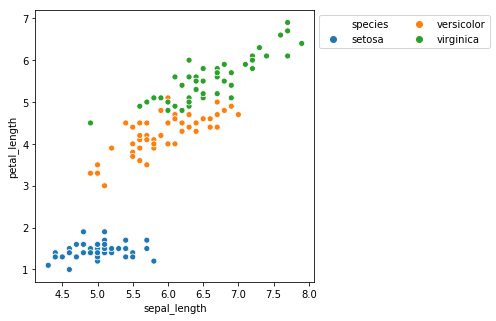

In [54]:
# Now let's plot a scatter plot of two of these features coloring each dot by the species
plt.figure(figsize=(5, 5)) # Change the plot size (optional)
sns.scatterplot('sepal_length', 'petal_length', 'species', data=df)
plt.legend(bbox_to_anchor=(1, 1), ncol=2) # Move the legend and change number of columns (optional)
plt.show()

As you can see, when using `seaborn` we pass the **name** of the columns as parameters. If you [look at the `sns.scatterplot` documentation](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) you'll see that this function, as almost all seaborn functions, accept `x`, `y`, and `hue`, as the first three arguments.

# Start
The "assignment" or whatever starts here. From here on out, we will operate with the synthetically generated weight over time data. We will load and then do some basic analysis and plotting which will require some transformations, merging, and aggregation.

In [10]:
"""Load observed data"""
# Load wideform observed weight data with pandas
df = pd.read_csv('weight_data.csv')
df.head()

,person,Week_0,Week_1,Week_2,Week_3,Week_4,Week_5
0,P0,167.743108,174.449221,173.804793,169.578463,172.608399,180.009209
1,P1,163.719962,167.928835,170.532989,164.634668,164.443746,164.951544
2,P2,175.474169,170.828989,172.094298,172.901199,181.604867,183.650401
3,P3,171.008108,168.270346,167.779617,167.917660,161.319162,165.010405
4,P4,167.238358,169.459805,174.775500,169.221694,173.373190,172.138097


In [9]:
# Load metadata
md = pd.read_csv('weight_metadata.csv')
md.head()

,person,sex,state
0,P0,male,MA
1,P1,male,NY
2,P2,male,CA
3,P3,male,TX
4,P4,male,MA


# Timeseries
Currently `df` is a wideform dataframe. (Again for a refresher on longform vs. wideform, check [here](https://github.com/michaelsilverstein/Pandas-and-Plotting/blob/master/lessons/melting_pivotting.ipynb)). Our current goal will be to plot timeseries data with the [`sns.lineplot`](https://seaborn.pydata.org/generated/seaborn.lineplot.html) function. In order to do this, we will want our dataframe to look like the following:

```python
melted.head()
```

| person | week | weight     |
|--------|------|------------|
| P0     | 0    | 167.743108 |
| P1     | 0    | 163.719962 |
| P2     | 0    | 175.474169 |
| P3     | 0    | 171.008108 |
| P4     | 0    | 167.238358 |


Notice that the `week` column contains the `int` **not** the `str` `Week_0`. If we were to extract the `0` from `Week_0` in standard python, we could do:
```python
int('Week_0'.split('_')[1])
```
In `pandas`, we can apply string operations like `split` to an entire column:
```python
# Split every element of the column `week` in the dataframe `melted` on '_', get the 1th element, and convert the result to `int`
melted['week'] = melted.week.str.split('_').str.get(1).astype(int)
```

Once our dataframe is melted, then we can plot with `sns.lineplot` to get the following:

![weight_timeseries](figures/weight_timeseries.png)

The circles (or `marker`s is bonus ;) )

In [16]:
"""Melt dataframe"""
# Melt and convert week to int
melted = df.melt('person', var_name='week', value_name='weight')
melted['week'] = melted.week.str.split('_').str.get(1)
melted.head()

,person,week,weight
0,P0,0,167.743108
1,P1,0,163.719962
2,P2,0,175.474169
3,P3,0,171.008108
4,P4,0,167.238358


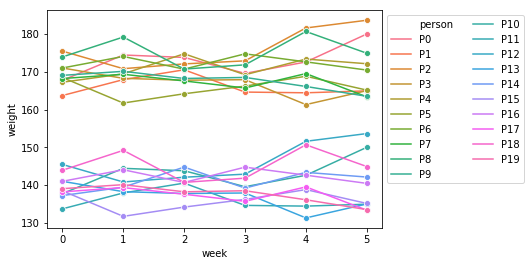

In [43]:
"""Plot"""
# Plot weight over time for each individual by coloring by each individual
sns.lineplot('week', 'weight', 'person', data=melted, marker='o', markersize=6)
plt.legend(bbox_to_anchor=(1, 1), ncol=2)
plt.savefig('figures/weight_timeseries', bbox_inches='tight')
plt.show()

# Timeseries + metadata
We can already see some stratification in the data - there are clearly two larger groupings of types of people and then within each group it seems as if some people have gained weight and others have lost weight. 

Let's use the associated **metadata** to see if we can explore if there are any underlying trends. First we will have to [merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) the metadata with our observed data and then we can use the resulting dataframe to add more information to our plot:

![timeseries+md](figures/weight_timeseries+md.png)
- `sns.lineplot` will default to using dashes for the column passed to the `style` column - how can we turn off the dashses and use markers?
- how can we change the thickness of the lines?

In [56]:
"""Merge metadata"""
df = melted.merge(md)
df.head()

,person,week,weight,sex,state
0,P0,0,167.743108,male,MA
1,P0,1,174.449221,male,MA
2,P0,2,173.804793,male,MA
3,P0,3,169.578463,male,MA
4,P0,4,172.608399,male,MA


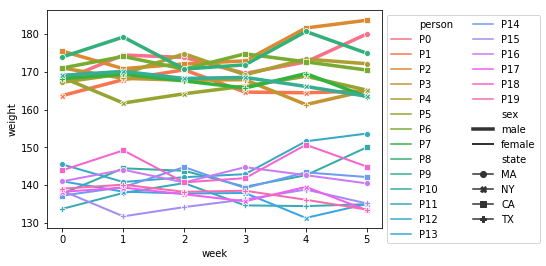

In [61]:
"""Plot"""
sns.lineplot('week', 'weight', 'person', 'sex', 'state', df, dashes=False, markers=True, sizes=(2, 3.5))
plt.legend(bbox_to_anchor=(1, 1), ncol=2)
plt.savefig('figures/weight_timeseries+md', bbox_inches='tight')
plt.show()

# Comparing gender
- take mean in order to ensure independence
- palettes

# Timeseries $\Delta$Baseline

# Scatter with calorie intake?
- Ask for matplotlib